# Data analysis of Car sales in Year 2021

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sn
import os
from pandas.plotting import scatter_matrix
from pandas.core.groupby.grouper import get_grouper
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import datetime

# Importing datasets

In [2]:
df_data = pd.read_csv(r"D:\sales(car).csv")
df_data.head()

,year,month,company_name,segment,body_type,car_name,sales,price(5-10lakhs),price(10-20lakhs),price(20-30lakhs),price(30-40lakhs),price(40-50lakhs),price(50 lakhs-1crore),Unnamed: 13,Unnamed: 14
0,2021,january,Tata,B2,hatchback,Altroz,7378,yes,no,no,no,no,no,NaN,NaN
1,2021,february,Tata,B2,hatchback,Altroz,6832,yes,no,no,no,no,no,NaN,NaN
2,2021,march,Tata,B2,hatchback,Altroz,7550,yes,no,no,no,no,no,NaN,NaN
3,2021,april,Tata,B2,hatchback,Altroz,6649,yes,no,no,no,no,no,NaN,NaN
4,2021,may,Tata,B2,hatchback,Altroz,2896,yes,no,no,no,no,no,NaN,NaN


In [3]:
df_data.tail()

,year,month,company_name,segment,body_type,car_name,sales,price(5-10lakhs),price(10-20lakhs),price(20-30lakhs),price(30-40lakhs),price(40-50lakhs),price(50 lakhs-1crore),Unnamed: 13,Unnamed: 14
919,2021,august,Toyota,E,Mpv,Vellfire,54,no,no,no,no,no,yes,NaN,NaN
920,2021,september,Toyota,E,Mpv,Vellfire,52,no,no,no,no,no,yes,NaN,NaN
921,2021,october,Toyota,E,Mpv,Vellfire,77,no,no,no,no,no,yes,NaN,NaN
922,2021,november,Toyota,E,Mpv,Vellfire,53,no,no,no,no,no,yes,NaN,NaN
923,2021,december,Toyota,E,Mpv,Vellfire,23,no,no,no,no,no,yes,NaN,NaN


# Checking Dimension of data

In [4]:
print(df_data.shape)

(924, 15)


In [5]:
# It has 924 rows and 15 columns

# Checking the columns

In [6]:
print(df_data.columns.unique())

Index(['year', 'month', 'company_name', 'segment', 'body_type', 'car_name',
       'sales', 'price(5-10lakhs)', 'price(10-20lakhs)', 'price(20-30lakhs)',
       'price(30-40lakhs)', 'price(40-50lakhs)', 'price(50 lakhs-1crore)',
       'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')


# Dropping of columns

In [7]:
df = df_data.drop(columns=["Unnamed: 13","Unnamed: 14"],axis = 1)
df

,year,month,company_name,segment,body_type,car_name,sales,price(5-10lakhs),price(10-20lakhs),price(20-30lakhs),price(30-40lakhs),price(40-50lakhs),price(50 lakhs-1crore)
0,2021,january,Tata,B2,hatchback,Altroz,7378,yes,no,no,no,no,no
1,2021,february,Tata,B2,hatchback,Altroz,6832,yes,no,no,no,no,no
2,2021,march,Tata,B2,hatchback,Altroz,7550,yes,no,no,no,no,no
3,2021,april,Tata,B2,hatchback,Altroz,6649,yes,no,no,no,no,no
4,2021,may,Tata,B2,hatchback,Altroz,2896,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,2021,august,Toyota,E,Mpv,Vellfire,54,no,no,no,no,no,yes
920,2021,september,Toyota,E,Mpv,Vellfire,52,no,no,no,no,no,yes
921,2021,october,Toyota,E,Mpv,Vellfire,77,no,no,no,no,no,yes
922,2021,november,Toyota,E,Mpv,Vellfire,53,no,no,no,no,no,yes


In [8]:
# Once again checking the dimension of the updated datset

In [9]:
df.shape

(924, 13)

In [10]:
# now the updated dataset has 924 rows and 13 columns

# Checking different Companies name

In [11]:
print(df.company_name.unique())

['Tata' 'Mahindra' 'Kia' 'MG' 'Honda' 'Renault' 'Maruti Suzuki' 'Hyundai'
 'Nissan' 'Citreon ' 'Skoda' 'Datsun' 'Jeep' 'Volkswagon' 'Toyota']


# Checking different segment cars

In [12]:
print(df.segment.unique())

['B2' 'A2' 'B1' 'D1' 'D2' 'C1' 'C2' 'A1' 'B2  ' 'E']


# Checking different body types

In [13]:
print(df.body_type.unique())

['hatchback' 'compact-hatchback' 'compact-suv' 'Mid-suv' 'Compact -sedan'
 'MPV' 'large-suv' 'Sedan' 'Crossover' 'Mpv' 'sedan']


# Sum of Sales based on body type

In [14]:
print(df.groupby('body_type')['sales'].sum())

body_type
Compact -sedan        18900
Crossover             12036
MPV                  307698
Mid-suv              560856
Mpv                   55767
Sedan                272272
compact-hatchback    724404
compact-suv          582577
hatchback            536159
large-suv             23020
sedan                   520
Name: sales, dtype: int64


# No of Car Sales by each company

In [15]:
print(df.groupby('company_name')['sales'].sum())

company_name
Citreon              679
Datsun              4296
Honda              80062
Hyundai           614993
Jeep               11607
Kia               178737
MG                 38183
Mahindra          165922
Maruti Suzuki    1364786
Nissan             35946
Renault            95248
Skoda              23802
Tata              332004
Toyota            130803
Volkswagon         17141
Name: sales, dtype: int64


# Monthly Car Sales

In [16]:
print(df.groupby(['month'])['sales'].sum())

month
april        265668
august       366336
december     248498
february     298650
january      295130
july         287186
june         246301
march        311956
may          100714
november     237871
october      254310
september    181589
Name: sales, dtype: int64


# Car sales based on segment

In [17]:
print(df.groupby('segment')['sales'].sum())

segment
A1       266673
A2       306803
B1       542593
B2      1068383
B2         3119
C1       208433
C2        79057
D1       528474
D2        90157
E           517
Name: sales, dtype: int64


# Checking the Car Names

In [18]:
print(df.car_name.unique())

['Altroz' 'Tiago' 'Punch' 'Nexon' 'Harrier' 'Safari' 'Tigor' 'XUV700'
 'Thar' 'XUV300' 'Bolero' 'KUV100' 'XUV500' 'Morozzo' 'AlturasG4' 'Seltos'
 'Sonet' 'Carnival' 'Hector' 'ZS-ev' 'Gloster' 'City' 'Wrv' 'Jazz' 'Amaze'
 'Duster' 'Kiger' 'Kwid' 'Triber' 'Alto' 'Baleno' 'Celerio' 'Ciaz' 'Dzire'
 'Eeco' 'Ertiga' 'Ignis' 'S-cross' 'S-presso' 'Swift' 'Vitara Brezza'
 'Wagon-r' 'XL6' 'Alcazar' 'Creta' 'Elantra' 'Grand i10' 'i20' 'Kona'
 'Santro' 'Tucson' 'Venue' 'Verna' 'Aura' 'Kicks' 'Magnite' 'C5 Aircross'
 'Karoq' 'Octavia' 'Rapid' 'Superb' 'Kushaq' 'go' 'go+' 'Redigo' 'compass'
 'Polo' 'Vento' 'Tiguan' 'T-Roc' 'Urban Cruiser' 'Glanza' 'Innova'
 'Fortuner' 'Yaris' 'Camry' 'Vellfire']


# Top 10 Car Sales

In [19]:
print(df.groupby('car_name')['sales'].sum().nlargest(10).to_frame())

                sales
car_name             
Creta          235437
Wagon-r        183881
Swift          175052
Baleno         172237
Alto           166233
Dzire          116222
Vitara Brezza  115962
Eeco           114524
Ertiga         114408
Nexon          108547


# Top 5 company based on car sales

In [20]:
print(df.groupby('company_name')['sales'].sum().nlargest(5).to_frame())

                 sales
company_name          
Maruti Suzuki  1364786
Hyundai         614993
Tata            332004
Kia             178737
Mahindra        165922


# Top 5 body type sales

In [21]:
print(df.groupby('body_type')['sales'].sum().nlargest(5).to_frame())

                    sales
body_type                
compact-hatchback  724404
compact-suv        582577
Mid-suv            560856
hatchback          536159
MPV                307698


# Filtering of data for the price range

In [43]:
df1 = df_data.drop(columns=['price(20-30lakhs)','price(30-40lakhs)','price(40-50lakhs)','price(50 lakhs-1crore)',"Unnamed: 13",'Unnamed: 14'],axis = 1)
df1

,year,month,company_name,segment,body_type,car_name,sales,price(5-10lakhs),price(10-20lakhs)
0,2021,january,Tata,B2,hatchback,Altroz,7378,yes,no
1,2021,february,Tata,B2,hatchback,Altroz,6832,yes,no
2,2021,march,Tata,B2,hatchback,Altroz,7550,yes,no
3,2021,april,Tata,B2,hatchback,Altroz,6649,yes,no
4,2021,may,Tata,B2,hatchback,Altroz,2896,yes,no
...,...,...,...,...,...,...,...,...,...
919,2021,august,Toyota,E,Mpv,Vellfire,54,no,no
920,2021,september,Toyota,E,Mpv,Vellfire,52,no,no
921,2021,october,Toyota,E,Mpv,Vellfire,77,no,no
922,2021,november,Toyota,E,Mpv,Vellfire,53,no,no


In [46]:
filt = (df1['price(5-10lakhs)'] =='yes') & (df1['price(10-20lakhs)']=='no')

In [47]:
df = df1[filt]
df

,year,month,company_name,segment,body_type,car_name,sales,price(5-10lakhs),price(10-20lakhs)
0,2021,january,Tata,B2,hatchback,Altroz,7378,yes,no
1,2021,february,Tata,B2,hatchback,Altroz,6832,yes,no
2,2021,march,Tata,B2,hatchback,Altroz,7550,yes,no
3,2021,april,Tata,B2,hatchback,Altroz,6649,yes,no
4,2021,may,Tata,B2,hatchback,Altroz,2896,yes,no
...,...,...,...,...,...,...,...,...,...
859,2021,august,Toyota,B2,hatchback,Glanza,1832,yes,no
860,2021,september,Toyota,B2,hatchback,Glanza,1764,yes,no
861,2021,october,Toyota,B2,hatchback,Glanza,2202,yes,no
862,2021,november,Toyota,B2,hatchback,Glanza,1904,yes,no


# Car names priced in the range of 5-10 lakhs

In [48]:
print(df.car_name.unique())

['Altroz' 'Tiago' 'Punch' 'Tigor' 'KUV100' 'Kiger' 'Kwid' 'Triber' 'Alto'
 'Baleno' 'Celerio' 'Dzire' 'Eeco' 'Ignis' 'S-presso' 'Swift' 'Wagon-r'
 'Grand i10' 'Santro' 'Aura' 'Magnite' 'go' 'go+' 'Redigo' 'Polo' 'Glanza']


# Total Cars priced in the range of 5-10 lakhs

In [49]:
print(df.car_name.nunique())

26


In [ ]:
# There are total of 26 cars priced between range of 5-10 lakhs

In [ ]:
# using the filter for the next price range

In [50]:
filt = (df1['price(5-10lakhs)'] =='yes') & (df1['price(10-20lakhs)']=='yes')

In [51]:
df = df1[filt]
df

,year,month,company_name,segment,body_type,car_name,sales,price(5-10lakhs),price(10-20lakhs)
36,2021,january,Tata,B2,compact-suv,Nexon,8225,yes,yes
37,2021,february,Tata,B2,compact-suv,Nexon,7929,yes,yes
38,2021,march,Tata,B2,compact-suv,Nexon,8683,yes,yes
39,2021,april,Tata,B2,compact-suv,Nexon,6938,yes,yes
40,2021,may,Tata,B2,compact-suv,Nexon,6439,yes,yes
...,...,...,...,...,...,...,...,...,...
847,2021,august,Toyota,B2,compact-suv,Urban Cruiser,2654,yes,yes
848,2021,september,Toyota,B2,compact-suv,Urban Cruiser,816,yes,yes
849,2021,october,Toyota,B2,compact-suv,Urban Cruiser,2100,yes,yes
850,2021,november,Toyota,B2,compact-suv,Urban Cruiser,2850,yes,yes


# Car names priced in the range of 5-20 lakhs

In [52]:
print(df.car_name.unique())

['Nexon' 'Sonet' 'Jazz' 'Amaze' 'Duster' 'Ciaz' 'Ertiga' 'Vitara Brezza'
 'i20' 'Venue' 'Kicks' 'Urban Cruiser']


# Total Cars priced in the range of 5-20 lakhs

In [53]:
print(df.car_name.nunique())

12


In [ ]:
#  There are total of 12 cars priced between range of 5-20 lakhs

In [ ]:
# Filtering for the price range between 5 to 30 lakhs

In [61]:
df1 = df_data.drop(columns=['price(30-40lakhs)','price(40-50lakhs)','price(50 lakhs-1crore)',"Unnamed: 13",'Unnamed: 14'],axis = 1)
df1

,year,month,company_name,segment,body_type,car_name,sales,price(5-10lakhs),price(10-20lakhs),price(20-30lakhs)
0,2021,january,Tata,B2,hatchback,Altroz,7378,yes,no,no
1,2021,february,Tata,B2,hatchback,Altroz,6832,yes,no,no
2,2021,march,Tata,B2,hatchback,Altroz,7550,yes,no,no
3,2021,april,Tata,B2,hatchback,Altroz,6649,yes,no,no
4,2021,may,Tata,B2,hatchback,Altroz,2896,yes,no,no
...,...,...,...,...,...,...,...,...,...,...
919,2021,august,Toyota,E,Mpv,Vellfire,54,no,no,no
920,2021,september,Toyota,E,Mpv,Vellfire,52,no,no,no
921,2021,october,Toyota,E,Mpv,Vellfire,77,no,no,no
922,2021,november,Toyota,E,Mpv,Vellfire,53,no,no,no


In [70]:
filt = (df1['price(5-10lakhs)'] =='yes') & (df1['price(10-20lakhs)']=='yes') & (df1['price(20-30lakhs)']=='yes') 

In [71]:
df2 = df1[filt]
df2

,year,month,company_name,segment,body_type,car_name,sales,price(5-10lakhs),price(10-20lakhs),price(20-30lakhs)


In [72]:
# Hence there are no cars in the price range between 5-30 lakhs

In [ ]:
# Filtering for the cars priced between 10 to 20 lakhs

In [80]:
df1 = df_data.drop(columns=['price(30-40lakhs)','price(40-50lakhs)','price(50 lakhs-1crore)',"Unnamed: 13",'Unnamed: 14'],axis = 1)
df1

,year,month,company_name,segment,body_type,car_name,sales,price(5-10lakhs),price(10-20lakhs),price(20-30lakhs)
0,2021,january,Tata,B2,hatchback,Altroz,7378,yes,no,no
1,2021,february,Tata,B2,hatchback,Altroz,6832,yes,no,no
2,2021,march,Tata,B2,hatchback,Altroz,7550,yes,no,no
3,2021,april,Tata,B2,hatchback,Altroz,6649,yes,no,no
4,2021,may,Tata,B2,hatchback,Altroz,2896,yes,no,no
...,...,...,...,...,...,...,...,...,...,...
919,2021,august,Toyota,E,Mpv,Vellfire,54,no,no,no
920,2021,september,Toyota,E,Mpv,Vellfire,52,no,no,no
921,2021,october,Toyota,E,Mpv,Vellfire,77,no,no,no
922,2021,november,Toyota,E,Mpv,Vellfire,53,no,no,no


In [81]:
filt = (df1['price(5-10lakhs)']=='no') & (df1['price(10-20lakhs)']=='yes') & (df1['price(20-30lakhs)']=='no')

In [82]:
df2 = df1[filt]
df2

,year,month,company_name,segment,body_type,car_name,sales,price(5-10lakhs),price(10-20lakhs),price(20-30lakhs)
96,2021,january,Mahindra,D1,compact-suv,Thar,3152,no,yes,no
97,2021,february,Mahindra,D1,compact-suv,Thar,2842,no,yes,no
98,2021,march,Mahindra,D1,compact-suv,Thar,1912,no,yes,no
99,2021,april,Mahindra,D1,compact-suv,Thar,3406,no,yes,no
100,2021,may,Mahindra,D1,compact-suv,Thar,1911,no,yes,no
...,...,...,...,...,...,...,...,...,...,...
895,2021,august,Toyota,C2,Sedan,Yaris,0,no,yes,no
896,2021,september,Toyota,C2,Sedan,Yaris,0,no,yes,no
897,2021,october,Toyota,C2,Sedan,Yaris,0,no,yes,no
898,2021,november,Toyota,C2,Sedan,Yaris,0,no,yes,no


# Car names priced in the range of 10-20 lakhs

In [83]:
print(df2.car_name.unique())

['Thar' 'XUV300' 'Bolero' 'XUV500' 'Morozzo' 'Seltos' 'City' 'Wrv'
 'S-cross' 'XL6' 'Creta' 'Verna' 'Rapid' 'Kushaq' 'Vento' 'Yaris']


#  Total Cars priced in the range of 10-20 lakhs

In [84]:
print(df2.car_name.nunique())

16


In [ ]:
# There are total of 16 cars priced between range of 10-20 lakhs

In [85]:
# Filtering for the cars priced between 10 to 30 lakhs

In [86]:
filt = (df1['price(5-10lakhs)']=='no') & (df1['price(10-20lakhs)']=='yes') & (df1['price(20-30lakhs)']=='yes')

In [87]:
df2 = df1[filt]
df2

,year,month,company_name,segment,body_type,car_name,sales,price(5-10lakhs),price(10-20lakhs),price(20-30lakhs)
48,2021,january,Tata,D1,Mid-suv,Harrier,2443,no,yes,yes
49,2021,february,Tata,D1,Mid-suv,Harrier,2030,no,yes,yes
50,2021,march,Tata,D1,Mid-suv,Harrier,2284,no,yes,yes
51,2021,april,Tata,D1,Mid-suv,Harrier,1712,no,yes,yes
52,2021,may,Tata,D1,Mid-suv,Harrier,1360,no,yes,yes
...,...,...,...,...,...,...,...,...,...,...
871,2021,august,Toyota,D1,Mpv,Innova,5755,no,yes,yes
872,2021,september,Toyota,D1,Mpv,Innova,4724,no,yes,yes
873,2021,october,Toyota,D1,Mpv,Innova,6096,no,yes,yes
874,2021,november,Toyota,D1,Mpv,Innova,6300,no,yes,yes


# Car names priced in the range of 10-30 lakhs

In [88]:
print(df2.car_name.unique())

['Harrier' 'Safari' 'XUV700' 'Hector' 'Alcazar' 'Elantra' 'compass'
 'Innova']


# Total Cars priced in the range of 10-30 lakhs

In [89]:
print(df2.car_name.nunique())

8


In [110]:
# There are total of 8 cars priced between range of 10-30 lakhs

In [98]:
df1 = df_data.drop(columns=['price(40-50lakhs)','price(5-10lakhs)','price(50 lakhs-1crore)',"Unnamed: 13",'Unnamed: 14'],axis = 1)
df1.head()

,year,month,company_name,segment,body_type,car_name,sales,price(10-20lakhs),price(20-30lakhs),price(30-40lakhs)
0,2021,january,Tata,B2,hatchback,Altroz,7378,no,no,no
1,2021,february,Tata,B2,hatchback,Altroz,6832,no,no,no
2,2021,march,Tata,B2,hatchback,Altroz,7550,no,no,no
3,2021,april,Tata,B2,hatchback,Altroz,6649,no,no,no
4,2021,may,Tata,B2,hatchback,Altroz,2896,no,no,no


In [93]:
# Filtering for the cars priced between 10 to 40 lakhs

In [95]:
filt = (df1['price(10-20lakhs)']=='yes') & (df1['price(20-30lakhs)']=='yes') & (df1['price(30-40lakhs)']=='yes')

In [97]:
df2=df1[filt]
df2.head()

,year,month,company_name,segment,body_type,car_name,sales,price(10-20lakhs),price(20-30lakhs),price(30-40lakhs)
780,2021,january,Jeep,D2,Mid-suv,compass,349,yes,yes,yes
781,2021,february,Jeep,D2,Mid-suv,compass,1103,yes,yes,yes
782,2021,march,Jeep,D2,Mid-suv,compass,1360,yes,yes,yes
783,2021,april,Jeep,D2,Mid-suv,compass,846,yes,yes,yes
784,2021,may,Jeep,D2,Mid-suv,compass,475,yes,yes,yes


# Car names priced between 10 to 40 lakhs

In [99]:
print(df2.car_name.unique())

['compass']


# Total cars priced between 10 to 40 lakhs

In [115]:
print(df2.car_name.nunique())

6


In [105]:
df1 = df_data.drop(columns=['price(5-10lakhs)','price(40-50lakhs)','price(50 lakhs-1crore)',"Unnamed: 13",'Unnamed: 14'],axis = 1)
df1

,year,month,company_name,segment,body_type,car_name,sales,price(10-20lakhs),price(20-30lakhs),price(30-40lakhs)
0,2021,january,Tata,B2,hatchback,Altroz,7378,no,no,no
1,2021,february,Tata,B2,hatchback,Altroz,6832,no,no,no
2,2021,march,Tata,B2,hatchback,Altroz,7550,no,no,no
3,2021,april,Tata,B2,hatchback,Altroz,6649,no,no,no
4,2021,may,Tata,B2,hatchback,Altroz,2896,no,no,no
...,...,...,...,...,...,...,...,...,...,...
919,2021,august,Toyota,E,Mpv,Vellfire,54,no,no,no
920,2021,september,Toyota,E,Mpv,Vellfire,52,no,no,no
921,2021,october,Toyota,E,Mpv,Vellfire,77,no,no,no
922,2021,november,Toyota,E,Mpv,Vellfire,53,no,no,no


In [106]:
filt = (df1['price(10-20lakhs)']=='no') & (df1['price(20-30lakhs)']=='yes') & (df1['price(30-40lakhs)']=='no')

In [108]:
df2 = df1[filt]
df2.head()

,year,month,company_name,segment,body_type,car_name,sales,price(10-20lakhs),price(20-30lakhs),price(30-40lakhs)
228,2021,january,MG,D1,compact-suv,ZS-ev,124,no,yes,no
229,2021,february,MG,D1,compact-suv,ZS-ev,204,no,yes,no
230,2021,march,MG,D1,compact-suv,ZS-ev,303,no,yes,no
231,2021,april,MG,D1,compact-suv,ZS-ev,156,no,yes,no
232,2021,may,MG,D1,compact-suv,ZS-ev,84,no,yes,no


# Car names priced between 20 to 30 lakhs

In [109]:
print(df2.car_name.unique())

['ZS-ev' 'Kona' 'Tucson' 'Karoq' 'Octavia' 'T-Roc']


In [112]:
print(df2.car_name.nunique())

6


In [113]:
# There are total of 6 cars priced between  range of 20-30 lakhs

# Car names priced between 20 to 40 lakhs

In [116]:
filt = (df1['price(10-20lakhs)']=='no') & (df1['price(20-30lakhs)']=='yes') & (df1['price(30-40lakhs)']=='yes')

In [117]:
df2 = df1[filt]
df2.head()

,year,month,company_name,segment,body_type,car_name,sales,price(10-20lakhs),price(20-30lakhs),price(30-40lakhs)
168,2021,january,Mahindra,D2,large-suv,AlturasG4,10,no,yes,yes
169,2021,february,Mahindra,D2,large-suv,AlturasG4,36,no,yes,yes
170,2021,march,Mahindra,D2,large-suv,AlturasG4,49,no,yes,yes
171,2021,april,Mahindra,D2,large-suv,AlturasG4,24,no,yes,yes
172,2021,may,Mahindra,D2,large-suv,AlturasG4,9,no,yes,yes


In [119]:
print(df2.car_name.unique())

['AlturasG4']


In [120]:
# There is only one car priced in the range of 20-40 lakhs

In [121]:
filt = (df1['price(10-20lakhs)']=='no') & (df1['price(20-30lakhs)']=='no') & (df1['price(30-40lakhs)']=='yes')

In [122]:
df2 = df1[filt]
df2.head()

,year,month,company_name,segment,body_type,car_name,sales,price(10-20lakhs),price(20-30lakhs),price(30-40lakhs)
204,2021,january,Kia,D2,MPV,Carnival,328,no,no,yes
205,2021,february,Kia,D2,MPV,Carnival,400,no,no,yes
206,2021,march,Kia,D2,MPV,Carnival,45,no,no,yes
207,2021,april,Kia,D2,MPV,Carnival,355,no,no,yes
208,2021,may,Kia,D2,MPV,Carnival,146,no,no,yes


In [131]:
df1 = df_data.drop(columns=['price(5-10lakhs)','price(10-20lakhs)','price(20-30lakhs)','price(50 lakhs-1crore)',"Unnamed: 13",'Unnamed: 14'],axis = 1)
df1

,year,month,company_name,segment,body_type,car_name,sales,price(30-40lakhs),price(40-50lakhs)
0,2021,january,Tata,B2,hatchback,Altroz,7378,no,no
1,2021,february,Tata,B2,hatchback,Altroz,6832,no,no
2,2021,march,Tata,B2,hatchback,Altroz,7550,no,no
3,2021,april,Tata,B2,hatchback,Altroz,6649,no,no
4,2021,may,Tata,B2,hatchback,Altroz,2896,no,no
...,...,...,...,...,...,...,...,...,...
919,2021,august,Toyota,E,Mpv,Vellfire,54,no,no
920,2021,september,Toyota,E,Mpv,Vellfire,52,no,no
921,2021,october,Toyota,E,Mpv,Vellfire,77,no,no
922,2021,november,Toyota,E,Mpv,Vellfire,53,no,no


In [132]:
filt = (df1['price(30-40lakhs)']=='yes') & (df1['price(40-50lakhs)']=='no') 

In [133]:
df2 = df1[filt]
df2

,year,month,company_name,segment,body_type,car_name,sales,price(30-40lakhs),price(40-50lakhs)
168,2021,january,Mahindra,D2,large-suv,AlturasG4,10,yes,no
169,2021,february,Mahindra,D2,large-suv,AlturasG4,36,yes,no
170,2021,march,Mahindra,D2,large-suv,AlturasG4,49,yes,no
171,2021,april,Mahindra,D2,large-suv,AlturasG4,24,yes,no
172,2021,may,Mahindra,D2,large-suv,AlturasG4,9,yes,no
...,...,...,...,...,...,...,...,...,...
823,2021,august,Volkswagon,D2,Crossover,Tiguan,0,yes,no
824,2021,september,Volkswagon,D2,Crossover,Tiguan,0,yes,no
825,2021,october,Volkswagon,D2,Crossover,Tiguan,0,yes,no
826,2021,november,Volkswagon,D2,Crossover,Tiguan,0,yes,no


# Cars priced in the range of 30-40 lakhs

In [134]:
print(df2.car_name.unique())

['AlturasG4' 'Carnival' 'Gloster' 'C5 Aircross' 'Superb' 'compass'
 'Tiguan']


#  Total Cars priced in the range of 30-40 lakhs

In [135]:
print(df2.car_name.nunique())

7


In [136]:
filt = (df1['price(30-40lakhs)']=='yes') & (df1['price(40-50lakhs)']=='yes') 

In [137]:
df2 = df1[filt]
df2

,year,month,company_name,segment,body_type,car_name,sales,price(30-40lakhs),price(40-50lakhs)
876,2021,january,Toyota,D2,large-suv,Fortuner,1169,yes,yes
877,2021,february,Toyota,D2,large-suv,Fortuner,2053,yes,yes
878,2021,march,Toyota,D2,large-suv,Fortuner,2136,yes,yes
879,2021,april,Toyota,D2,large-suv,Fortuner,1414,yes,yes
880,2021,may,Toyota,D2,large-suv,Fortuner,15,yes,yes
881,2021,june,Toyota,D2,large-suv,Fortuner,549,yes,yes
882,2021,july,Toyota,D2,large-suv,Fortuner,1789,yes,yes
883,2021,august,Toyota,D2,large-suv,Fortuner,2387,yes,yes
884,2021,september,Toyota,D2,large-suv,Fortuner,1869,yes,yes
885,2021,october,Toyota,D2,large-suv,Fortuner,1893,yes,yes


# Cars priced in the range of 30-50 lakhs

In [139]:
df2.car_name.unique()

array(['Fortuner'], dtype=object)

In [140]:
# There is only one car priced in the range of 30-50 lakhs

In [141]:
filt = (df1['price(30-40lakhs)']=='no') & (df1['price(40-50lakhs)']=='yes') 

In [142]:
df2 = df1[filt]
df2

,year,month,company_name,segment,body_type,car_name,sales,price(30-40lakhs),price(40-50lakhs)
900,2021,january,Toyota,D2,sedan,Camry,45,no,yes
901,2021,february,Toyota,D2,sedan,Camry,15,no,yes
902,2021,march,Toyota,D2,sedan,Camry,31,no,yes
903,2021,april,Toyota,D2,sedan,Camry,20,no,yes
904,2021,may,Toyota,D2,sedan,Camry,0,no,yes
905,2021,june,Toyota,D2,sedan,Camry,38,no,yes
906,2021,july,Toyota,D2,sedan,Camry,101,no,yes
907,2021,august,Toyota,D2,sedan,Camry,87,no,yes
908,2021,september,Toyota,D2,sedan,Camry,59,no,yes
909,2021,october,Toyota,D2,sedan,Camry,72,no,yes


In [143]:
print(df2.car_name.unique())

['Camry']


In [144]:
#There is only one car in the price range between 40-50 lakhs

In [145]:
df1 = df_data.drop(columns=['price(5-10lakhs)','price(10-20lakhs)','price(20-30lakhs)','price(30-40lakhs)','price(40-50lakhs)',"Unnamed: 13",'Unnamed: 14'],axis = 1)
df1

,year,month,company_name,segment,body_type,car_name,sales,price(50 lakhs-1crore)
0,2021,january,Tata,B2,hatchback,Altroz,7378,no
1,2021,february,Tata,B2,hatchback,Altroz,6832,no
2,2021,march,Tata,B2,hatchback,Altroz,7550,no
3,2021,april,Tata,B2,hatchback,Altroz,6649,no
4,2021,may,Tata,B2,hatchback,Altroz,2896,no
...,...,...,...,...,...,...,...,...
919,2021,august,Toyota,E,Mpv,Vellfire,54,yes
920,2021,september,Toyota,E,Mpv,Vellfire,52,yes
921,2021,october,Toyota,E,Mpv,Vellfire,77,yes
922,2021,november,Toyota,E,Mpv,Vellfire,53,yes


In [146]:
filt = (df1['price(50 lakhs-1crore)']=='yes')  

In [147]:
df2 = df1[filt]
df2

,year,month,company_name,segment,body_type,car_name,sales,price(50 lakhs-1crore)
912,2021,january,Toyota,E,Mpv,Vellfire,39,yes
913,2021,february,Toyota,E,Mpv,Vellfire,34,yes
914,2021,march,Toyota,E,Mpv,Vellfire,65,yes
915,2021,april,Toyota,E,Mpv,Vellfire,25,yes
916,2021,may,Toyota,E,Mpv,Vellfire,1,yes
917,2021,june,Toyota,E,Mpv,Vellfire,63,yes
918,2021,july,Toyota,E,Mpv,Vellfire,31,yes
919,2021,august,Toyota,E,Mpv,Vellfire,54,yes
920,2021,september,Toyota,E,Mpv,Vellfire,52,yes
921,2021,october,Toyota,E,Mpv,Vellfire,77,yes


In [149]:
df2.car_name.unique()

array(['Vellfire'], dtype=object)

# Data Visualization

# Pie plot for top 5 car sales

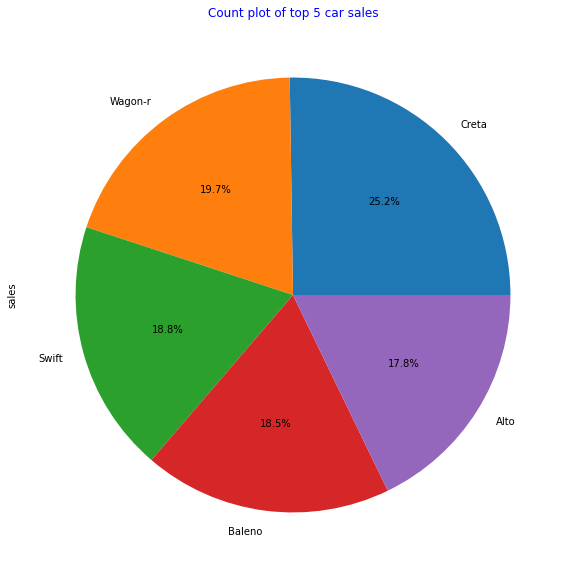

In [154]:
plt.figure(figsize=(12,10))
df1.groupby("car_name")['sales'].sum().nlargest(5).plot.pie(subplots="True",autopct ="%1.1f%%")
plt.title("Count plot of top 5 car sales",color='blue')
plt.show()

# Plot of Total sales for each segment cars 

segment
A1       266673
A2       306803
B1       542593
B2      1068383
B2         3119
C1       208433
C2        79057
D1       528474
D2        90157
E           517
Name: sales, dtype: int64


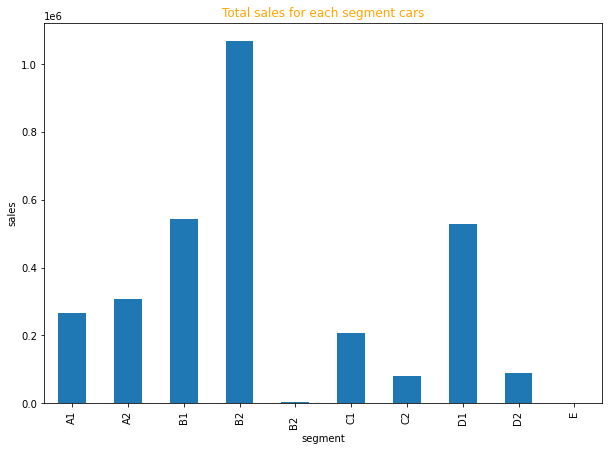

In [168]:
print(df1.groupby("segment")['sales'].sum())
plt.figure(figsize=(10,7))
plt.title("Total sales for each segment cars",color='orange')
df1.groupby("segment")['sales'].sum().plot.bar()
plt.ylabel('sales',color='black')
plt.show()

In [166]:
# The most of the cars were sold under B2 segment with the sales of 1068383 cars

# Plot of Total sales for each body-type cars

body_type
Compact -sedan        18900
Crossover             12036
MPV                  307698
Mid-suv              560856
Mpv                   55767
Sedan                272272
compact-hatchback    724404
compact-suv          582577
hatchback            536159
large-suv             23020
sedan                   520
Name: sales, dtype: int64


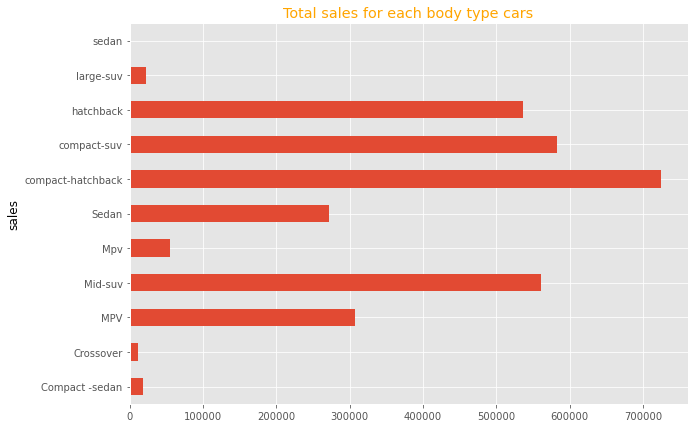

In [172]:
print(df1.groupby("body_type")['sales'].sum())
plt.figure(figsize=(10,7))
plt.title("Total sales for each body type cars",color='orange')
df1.groupby("body_type")['sales'].sum().plot.barh()
plt.style.use('ggplot')
plt.ylabel('sales',color='black')
plt.show()

#  Plot of Total Car sales for each company

company_name
Citreon              679
Datsun              4296
Honda              80062
Hyundai           614993
Jeep               11607
Kia               178737
MG                 38183
Mahindra          165922
Maruti Suzuki    1364786
Nissan             35946
Renault            95248
Skoda              23802
Tata              332004
Toyota            130803
Volkswagon         17141
Name: sales, dtype: int64


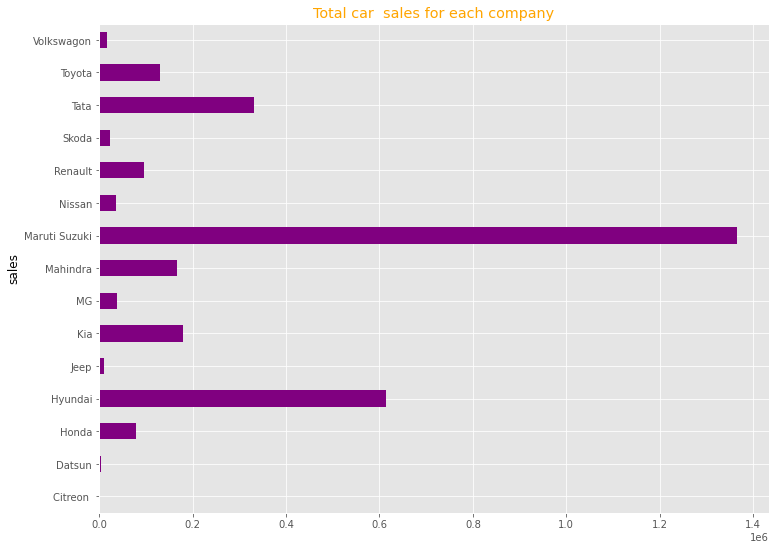

In [174]:
print(df1.groupby("company_name")['sales'].sum())
plt.figure(figsize=(12,9))
plt.title("Total car  sales for each company",color='orange')
df1.groupby("company_name")['sales'].sum().plot.barh(color= 'purple')
plt.style.use('ggplot')
plt.ylabel('sales',color='black')
plt.show()

# Plot of Monthly Car Sales

month
april        265668
august       366336
december     248498
february     298650
january      295130
july         287186
june         246301
march        311956
may          100714
november     237871
october      254310
september    181589
Name: sales, dtype: int64


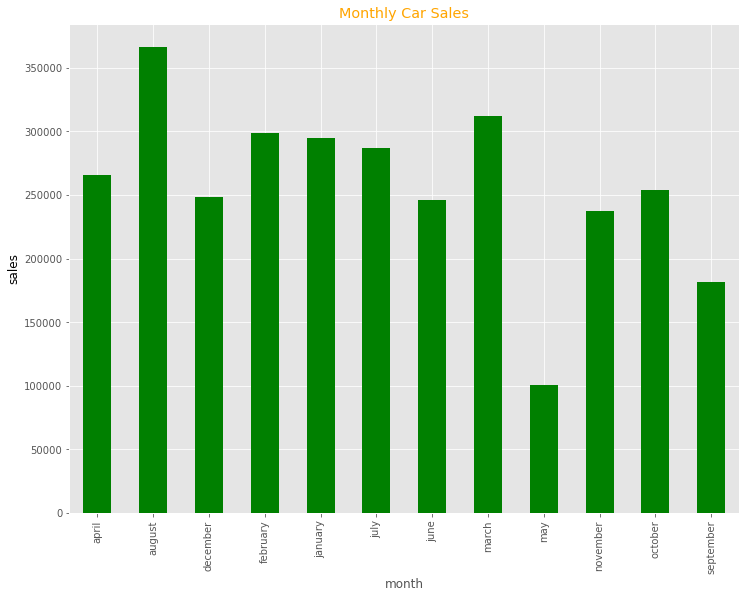

In [180]:
print(df1.groupby("month")['sales'].sum())
plt.figure(figsize=(12,9))
plt.title("Monthly Car Sales",color='orange')
df1.groupby("month")['sales'].sum().plot.bar(color= 'green')
plt.ylabel('sales',color='black')
plt.show()

# Heatmap for Corelation between columns

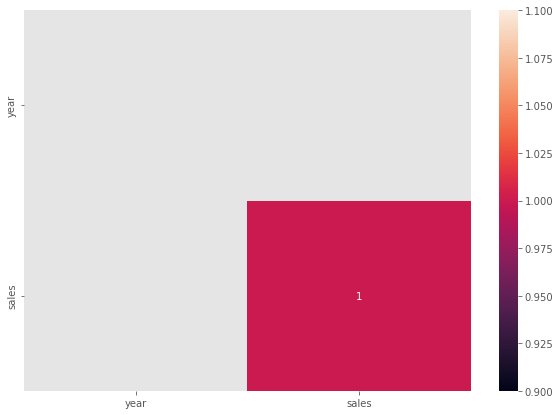

In [182]:
plt.figure(figsize=(10,7))
sn.heatmap(df1.corr(),annot=True)
plt.show()

# Heatmap for Covariance between columns

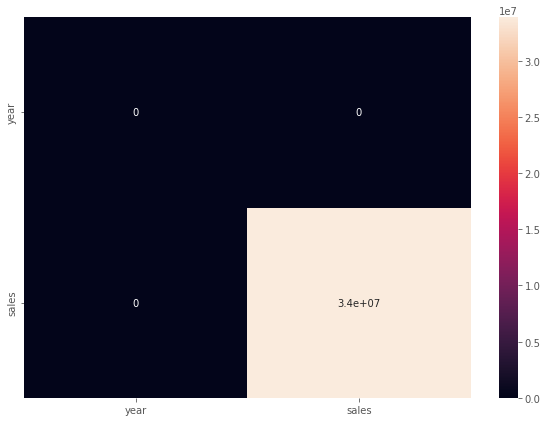

In [183]:
plt.figure(figsize=(10,7))
sn.heatmap(df1.cov(),annot=True)
plt.show()

# Pair Plot for segment

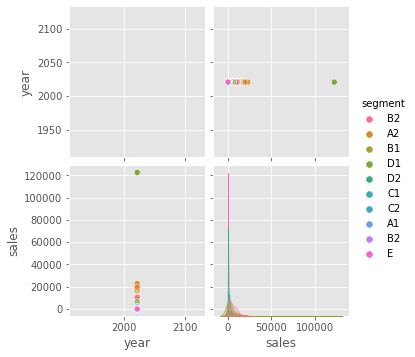

In [184]:
figsize=(10,7)
sn.pairplot(df1,hue="segment")

# Summarized Data

In [186]:
grouped = pd.DataFrame(df1.groupby(['company_name',"car_name","segment","body_type"])['sales'].sum().reset_index())
grouped

,company_name,car_name,segment,body_type,sales
0,Citreon,C5 Aircross,D2,Crossover,679
1,Datsun,Redigo,A1,compact-hatchback,3935
2,Datsun,go,A2,compact-hatchback,140
3,Datsun,go+,B1,MPV,221
4,Honda,Amaze,C1,Sedan,35777
...,...,...,...,...,...
73,Toyota,Yaris,C2,Sedan,2235
74,Volkswagon,Polo,B2,hatchback,14078
75,Volkswagon,T-Roc,D1,Crossover,1000
76,Volkswagon,Tiguan,D2,Crossover,177


# Statistical Summary

In [188]:
df1.groupby("car_name").sales.agg(["sum","mean","median","min","max","count","std","var"])

,sum,mean,median,min,max,count,std,var
car_name,,,,,,,,
Alcazar,17708,1475.666667,1376.0,0,3468,12,1316.332601,1.732732e+06
Alto,166233,13852.750000,13524.0,3220,18260,12,4179.490489,1.746814e+07
Altroz,69744,5812.000000,6262.5,2896,7550,12,1548.726632,2.398554e+06
AlturasG4,419,34.916667,38.0,9,80,12,20.681385,4.277197e+02
Amaze,35777,2981.416667,2676.5,0,6591,12,2093.450369,4.382534e+06
...,...,...,...,...,...,...,...,...
ZS-ev,2296,191.333333,180.0,84,303,12,77.745895,6.044424e+03
compass,11607,967.250000,984.0,349,1360,12,322.584485,1.040607e+05
go,140,11.666667,7.0,0,30,12,12.242499,1.498788e+02
